# Analisis de los Habitos de Lectura en  [Pocket](https://getpocket.com/)

![](Top.png)

Cómo he quedado en el 1% de lectores en [@Pocket para 2018!](Https://getpocket.com/stats/2018/d0ad36b5ca) He decidido analizar mis datos para tratar de entender mis hábitos de lectura en esta app.

Pero antes de comenzar a escribir código, debemos preguntarnos, ¿qué estamos buscando? ¿O qué queremos encontrar en el análisis? La mejor manera de hacer esto es hacer preguntas preliminares sobre los datos que queremos responder, como

- ¿Cuántos artículos he agregado a la app?
- ¿Cuántos % de los articulos agregados son revisados/leídos?
- ¿Cuantas paginas he lei en el 2018?
- ¿Cuantas horas hededicado a leer en esta app?
- ¿Sobre qué temas tratanta los articulos leidos?

Para intentar responder a esta preguntas, seguiremos los siguientes pasos.

0. Importar bibliotecas
1. ***Extraer ***. Configurar y obtener lo datos de la API de pocket con [request]() <br/>
1.1.Obtenerla consumer_Key <br/>
1.2.Obtener el token de solicitud <br/>
1.3.Autenticarse <br/>
1.4.Generar un access_token <br/>
1.5.Obtener datos <br/>
2. ***Transformar y cargar datos*** con [Pandas]() <br/>
2.1.Detecta el tipo de objeto python obtenido <br/>
2.2.Transformar los datos a un Pandas dataframe útil <br/>
2.3.Pre-analizar las columnas del dataframe <br/>
2.4.Debug el dataframe <br/>
3. ***Análisis de datos y visualización*** con [Pandas]() [Matplotlib]() [wordcloud]() [detectlanguage]() <br/>
3.1.Análisis numérico <br/>
3.2.Análisis de texto <br/>

***0.*** Import necessary libraries

In [1]:
import requests # para hacer solicitudes http en este caso a la api de pocket

# Transtformacion y analisis de datos
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json 
from collections import OrderedDict
from datetime import datetime

# analisis de texto
from wordcloud import WordCloud, STOPWORDS 
import detectlanguage #Api

#Visualizacion de datos
import matplotlib.pyplot as plt
# parametros de visualizaciones
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

%matplotlib inline  

## 1. Extraer. Configurar y obtener datos de la API

**1.1 Obtenga una consumer_key** cree una nueva [pocekt app](https://getpocket.com/developer/apps/new) <br/>
**1.2 Obtener request_token** Ahora ve a tu código de Python y pega la clave consumer_key en la función requests.post (). La respuesta de requests.post () se almacenará en la variable pocket_api. Verifique si la respuesta es correcta ejecutando pocket_api.status_code. Si la respuesta es 200, entonces la conexión se realizó con éxito. De lo contrario, intente comprender el motivo del error con el comando pocket_api.headers [‘X-Error’]. Finalmente, ejecute pocket_api.text para obtener su request_token. <br/>
**1.3 Autenticación** Ahora use el request_token obtenido anteriormente y autentíquese en su navegador. Reemplace el texto después de "? Request_token =" con el request_token generado anteriormente y pegue el siguiente enlace en el navegador y autentíquelo. <br/>
<br/>
https: //getpocket.com/auth/authorize? request_token = PASTE-YOUR-REQUEST-TOKEN-HERE & amp; amp; amp; amp; amp; amp; redirect_uri = https: //getpocket.com / connected_application <br/>

**1.4 Generar el access_token** Use su consumer_key y request_token generados anteriormente para llamar a requests.post () nuevamente y verifique el código de estado. Si es 200, ejecuta Pocket_auth.text y finalmente obtendrás tu access_token. <br/>

**1.5. Obtenga datos de la API** Use consumer_key y el request_token para hacer la solicitud de acuerdo con la documentación de la API 




In [3]:
# 1.2 obtegan el request token
# pocket_api alamcena una respuesta http
pocket_api = requests.post('https://getpocket.com/v3/oauth/request',
                           data = {'consumer_key':'PUT HERE YOUR CONSUMER KEY OBTAINED FROM POCKET',
                                   'redirect_uri':'https://google.com'})

# pocket_api.status_code es 200, entonces la conexión se realizó con éxito. 
# De lo contrario,  pocket_api.headers [‘X-Error’] para buscar el error
    # print(pocket_api.status_code) 
    # print(pocket_api.headers['X-Error'])

# su request_token esta en el metodo text -pocket_api.text-

#1.3 Autenticarte

# Modifica el link deabojo replazando el texto despues de "?request_token=" con el request_token geneado arriba 
#https://getpocket.com/auth/authorize?request_token=PASTE-YOUR-REQUEST-TOKEN-HERE&amp;amp;amp;amp;amp;amp;amp;amp;amp;redirect_uri=https://getpocket.com/connected_application

#1.4 genera access_token
pocket_auth = requests.post('https://getpocket.com/v3/oauth/authorize',
                            data = {'consumer_key':'PUT HERE YOUR CONSUMER KEY OBTAINED FROM POCKET',
                                    'code':'51947cf3-8998-32b6-e129-26e865'})

# revisa nuevamente la respuesta si es 200todo esta bien
# pocket_auth.status_code

# Ya estamo autenticados,y tu token de acceso esta -pocket_auth.text-


# 1.5 Traigamos los datos de la API

# referencias: https://getpocket.com/developer/docs/v3/retrieve
pocket_add = requests.post('https://getpocket.com/v3/get',
                           data= {'consumer_key':'82710-efa2906be95b400ce9fad6f8',#private
                                  'access_token':'81159e5f-c60a-dadd-0b50-1b1c40',#private
                                  'state':'all',
                                  'detailType':'simple'})
 
# revisa la respuesta nuevamente # pocket_add.status_code
 
# tus datos estan en -pocket_add.text


## 2.Transform data

***2.1.*** Detecta el tipo de objeto python obtenido.<br>
***2.2.*** Transforma de un objeto request a un pandas dataframe<br>
***2.3.*** Pre-analice las columnas del dataframe<br>
***2.4.*** Limpia y transforme su dataframe util de acuerdo con las preguntas iniciales

In [4]:
#2.1
print(type(pocket_add))

# 2.2
texto=pocket_add.text
json_data = json.loads(texto)
df= pd.DataFrame.from_dict(json_data['list']).T

#2.3

print(df.dtypes)
df.notnull().apply(pd.Series.value_counts)


amp_url                     object
domain_metadata             object
excerpt                     object
favorite                    object
given_title                 object
given_url                   object
has_image                   object
has_video                   object
is_article                  object
is_index                    object
item_id                     object
lang                        object
listen_duration_estimate    object
resolved_id                 object
resolved_title              object
resolved_url                object
sort_id                     object
status                      object
time_added                  object
time_favorited              object
time_read                   object
time_to_read                object
time_updated                object
top_image_url               object
word_count                  object
dtype: object


,amp_url,domain_metadata,excerpt,favorite,given_title,given_url,has_image,has_video,is_article,is_index,...,resolved_url,sort_id,status,time_added,time_favorited,time_read,time_to_read,time_updated,top_image_url,word_count
False,2314,1859,4,NaN,NaN,NaN,4,4,4,4,...,4,NaN,NaN,NaN,NaN,NaN,1270,NaN,1207,4
True,340,795,2650,2654.0,2654.0,2654.0,2650,2650,2650,2650,...,2650,2654.0,2654.0,2654.0,2654.0,2654.0,1384,2654.0,1447,2650


In [5]:
# 2.4 limpia y transforma conjunto de datos 
available = df.notnull()
mask= available['word_count']&available['time_to_read']
df = df[mask]

# revisa los tipos de datos
df.dtypes


In [8]:
#cambiar los tipo de dato necesarios

df[['status','favorite','word_count','time_to_read']] = df[['status','favorite','word_count','time_to_read']].astype(int)
df['time_added'] = pd.to_datetime(df['time_added'],unit='s')
df['time_read'] = pd.to_datetime(df['time_read'],unit='s')

#caracterisca de tiempo

df['mes']=df.time_read.dt.month
df['dia_sem']=df.time_read.dt.dayofweek
df['hora']=df.time_read.dt.hour

# la cantidad de palabras no es un buena referencia como si lo es la cantidad de paginas (entre 200 y 600 palabras por pagina)
df['pag']=df['word_count']/320

# 3. Analiside datos
## 3.1.Analisis numerico
Como el logro de pertenecer al 1% de los lectores de pocket se basa en los datos de 2018, es necesario filtrar los datos para analizar solo esta información.

In [5]:
# filtro de tiempo
start_date ='01-01-2018'
end_date = '31-12-2018'
mask_2 = (df['time_read'] > start_date) & (df['time_read'] <= end_date)
df_2018= df[mask_2]


In [31]:
#Borrar
df_2018=pd.read_csv('pocket_2018.csv')

start_date ='01-01-2018'
end_date = '31-12-2018'
mask_2 = (df_2018['time_read'] > start_date) & (df_2018['time_read'] <= end_date)
df_2018= df_2018[mask_2]

df_2018['time_read'] = pd.to_datetime(df_2018['time_read'])
df_2018['time_added'] = pd.to_datetime(df_2018['time_added'])
df_2018['mes']=df_2018.time_read.dt.month
df_2018['dia']=df_2018.time_read.dt.dayofyear
df_2018['dia_sem']=df_2018.time_read.dt.dayofweek
df_2018['hora']=df_2018.time_read.dt.hour
df_2018['pag']=df_2018['word_count']/320


### Respondamos las preguntas inciales

In [16]:
# Cuantos items agregue a pocket?
print('Cuantas URL fueron agregadas a pocket en el 2018? R\{}'.format(df_2018['item_id'].count()))
 
# Que % de  las URL son Revisadas = leido ?
print('Que % de las URL agregadas fueron revisadas = leido en el 2018? R\{}'.format((df_2018['status'].sum()*100)/df_2018['item_id'].count()))

# Que %  de las URL son articulos?
print('Que %  de las URL son articulos?? R\{}'.format((df_2018['is_article'].sum()*100)/df_2018['item_id'].count()))


Cuantas URL fueron agregadas a pocket en el 2018? R\824
Que % de las URL agregadas fueron revisadas = leido en el 2018? R\100.0
Que %  de las URL son articulos?? R\91.86893203883496


In [55]:
# Cual es el del tiempo de lectura? (minutes)
df_2018[['time_to_read','pag']].describe()

,time_to_read,pag
count,824.000000,824.000000
mean,8.115291,5.555992
std,9.846578,6.773979
min,3.000000,1.718750
25%,4.000000,2.648438
50%,6.000000,3.943750
75%,9.000000,6.375000
max,155.000000,106.865625


### Mas respuestas

In [47]:
#Cuantas palabras  he leido en el 2018
R1 = df_2018.loc[df_2018['status'] == 1, 'word_count'].sum()
print('Cuántas palabras he leído en el 2018? R/{}'.format(R1))

# ¿ A Cuántas paginas equivelen esta numero de palabras?
R2= df_2018.loc[df_2018['status'] == 1, 'pag'].sum()
print('Cuántas paginas equivalentes he leído en el 2018? R/{}'.format(R2)) 

# ¿ A Cuántas Libros equivelen esta numero de palabras?
R3=df_2018.loc[df_2018['status'] == 1, 'pag'].sum()/200
print('Cuántas Libros equivalentes he leído en el 2018? R/{}'.format(R3))

# ¿ Cuántas horas dedique a leer en pocket?
R4= df_2018.loc[df_2018['status'] == 1, 'time_to_read'].sum()/60
print('Cuántas horas dedique a leer en pocket en el 2018? R/{}'.format(R4))



Cuántas palabras he leído en el 2018? R/1465004
Cuántas paginas equivalentes he leído en el 2018? R/4578.1375
Cuántas Libros equivalentes he leído en el 2018? R/22.8906875
Cuántas horas dedique a leer en pocket en el 2018? R/111.45


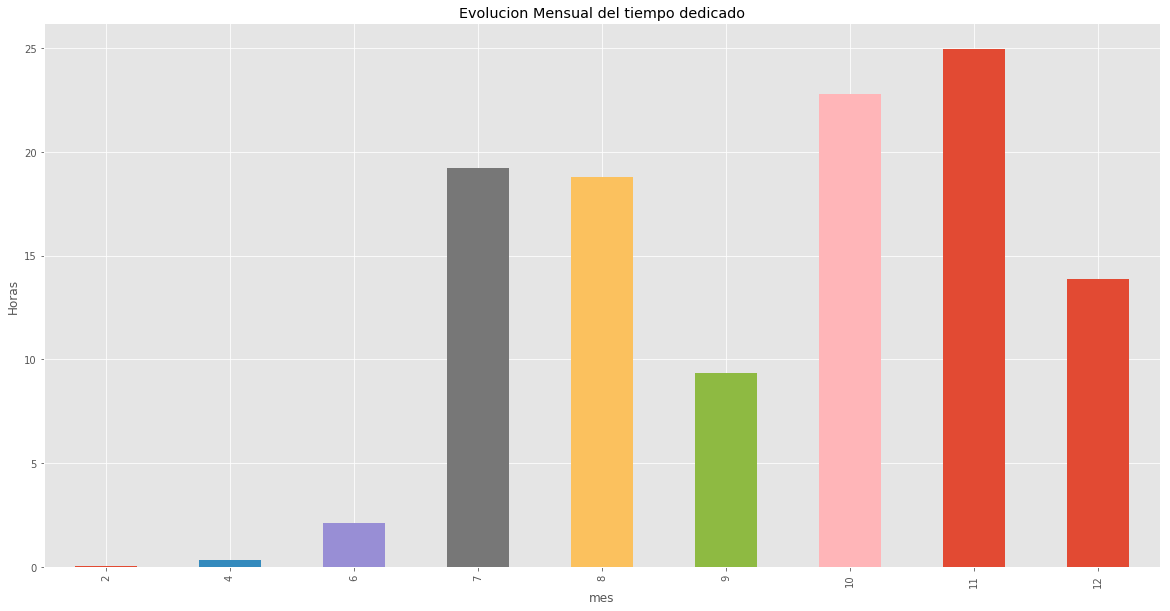

In [63]:
# Evolucion de los habitos de la letura en la app
evolucion_mensual = df_2018.groupby('mes')['time_to_read'].sum()/60
plt.figure(figsize=(20,10))
plt.title('Evolucion Mensual del tiempo dedicado')
plt.ylabel('Horas')
evolucion_mensual.plot.bar()

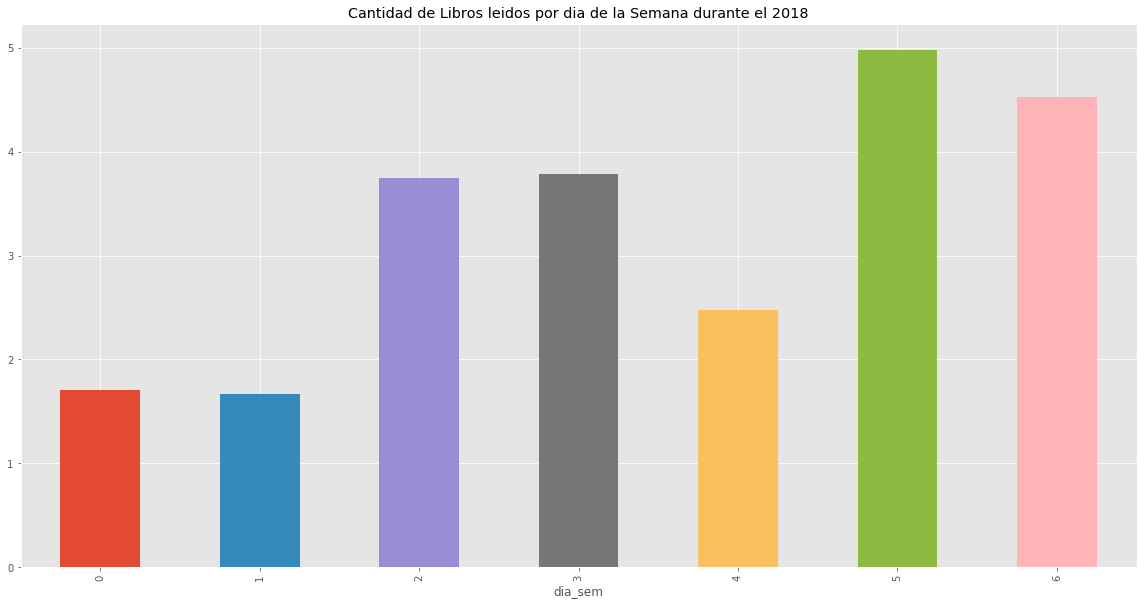

In [75]:
# que dia de la semana lo mas
dia_semana = df_2018.groupby('dia_sem')['pag'].sum()/200
plt.figure(figsize=(20,10))
plt.title('Cantidad de Libros leidos por dia de la Semana durante el 2018')
dia_semana.plot.bar()

## 3.2. Analisis de Texto

Parte del análisis que voy a hacer está respaldado por una API que detecta el lenguaje, ya que desarrollar y entrenar el algoritmo necesario para detectar el idioma está fuera de alcance.

Tenemos que hacer algo más de transformación para poder utilizar la API.

In [17]:
#preparando los datos para pasar un campo con la mayor cantidad de texto en este caso el extracto- excerpt
df_2018 = df_2018.reset_index()
texto = df_2018['excerpt'].tolist()


In [18]:
detectlanguage.configuration.api_key = "3a6545f3c5a180ff549ddf334d2ec8ec"
detectlanguage.user_status()    

{'date': '2019-02-02',
 'requests': 0,
 'bytes': 0,
 'plan': 'FREE',
 'plan_expires': None,
 'daily_requests_limit': 1000,
 'daily_bytes_limit': 1048576,
 'status': 'ACTIVE'}

In [19]:
language_analysis = detectlanguage.detect(texto)


In [20]:
# aggregar la list devuevalta por la API al dataframe

lista = []

for listItem in language_analysis:
    for item in listItem :
        lista.append(item.get('language'))
           
            
language_column= pd.Series(lista)           

df_2018['Lang']= language_column


In [79]:
df_2018.groupby('lang')['item_id'].count()

lang
en    694
es    130
Name: item_id, dtype: int64

Text(0.5,1,'Participacion por idioma')

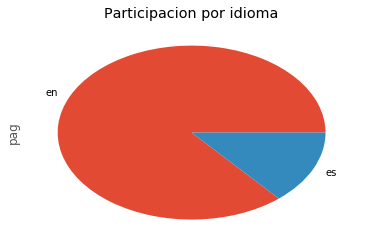

In [76]:
# Cual es particiapcion por idioma
plot_read = df_2018.groupby('lang')['pag'].sum()
plot_read.plot.pie()
plt.title('Participacion por idioma')

In [82]:
# Separando los dataframe por idioma
df_2018_En =df_2018[df_2018['lang']=='en'] 
df_2018_Es =df_2018[df_2018['lang']=='es']


In [83]:
meses = list(df_2018_En.groupby('mes')['mes'].count().index)

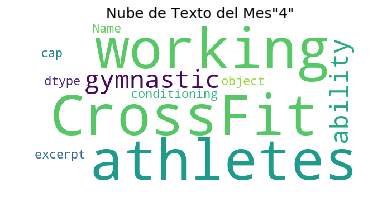

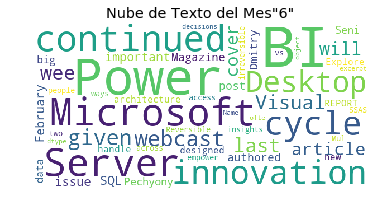

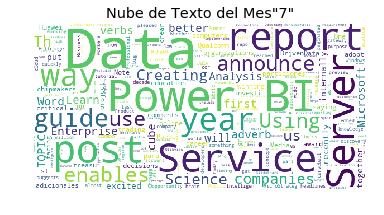

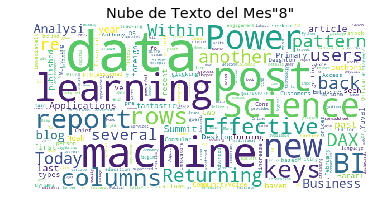

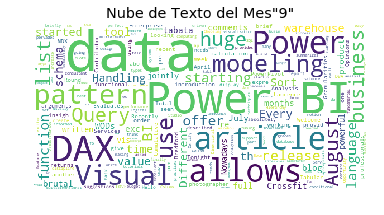

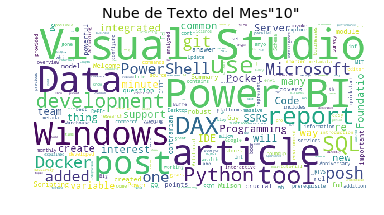

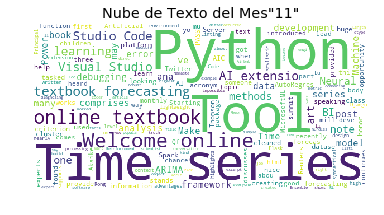

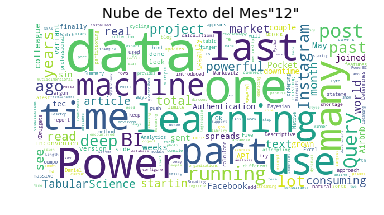

In [84]:
stopwords_en = set(STOPWORDS)
def nube_mes(mes):
    nube =   WordCloud(background_color='white',
                         width=600,
                         height=300,
                         stopwords=stopwords_en,
                         max_words=500,
                         max_font_size=100, 
                         random_state=42).generate(str(df_2018_En['excerpt'][df_2018_En['mes']== m]))
    plt.imshow(nube)
    plt.axis('off')
    plt.title('Nube de Texto del Mes"{}"'.format(mes))
    plt.show()
    plt.close()
    
    
for m in meses:
    nube_mes(m)   